In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# TensorFlow and tf.keras
import tensorflow as tf

import keras
import keras.backend
from keras import layers
from keras import models
from keras import optimizers
import keras.utils

from networkBuilder import *

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
cmap_roc = matplotlib.cm.get_cmap('Blues')
cmap_roc = matplotlib.cm.get_cmap('PuBuGn')
cmap_roc_blue = matplotlib.cm.get_cmap('Blues')
cmap_roc_grey = matplotlib.cm.get_cmap('Greys')
color_roc = np.linspace(0, 1, 5)
ls_roc = ['-', '-.', ':']

In [3]:
!ls

data		   python		    RNN_XAUGmsd_ROC.npz
LRP_hists.ipynb    RNN_Analysis.ipynb	    RNNXAUGroc.npz
model		   RNN.ipynb		    RNNXAUGrocv1.npz
networkBuilder.py  RNN_preprocessing.ipynb  RNN_XAUG_variables.ipynb
plots		   RNNroc1.npz		    ROC_comparison_test.png
__pycache__	   RNNrocv1.npz		    ROC_plots.ipynb


### Make ROC Curves for any missing files

In [4]:
data_sig_test = np.load('/mnt/data/ml/PreProcessing/ShowJets_test_Zbb_exts_v2.npz')
data_bg_test = np.load('/mnt/data/ml/PreProcessing/ShowJets_test_QCD_exts_v2.npz')

In [5]:
# model = keras.models.load_model('model/RNN_XAUG.h5')
# features = ['jetconstPt_log',
#             'jetconstEta_abs',
#             'jetconstE_log',
#             'jetconstPt_Jetlog',
#             'charge',
#             'isEle',
#             'isPho',
#             'isMuon',
#             'isCh',
#             'isNh',
#             'delta_eta',
#             'delta_phi',
#             'deltaR_jet',
#             'deltaR_subjet0',
#             'deltaR_subjet1',
#             'jetMassSD',
#             'deltaR_subjets',
#             'tau3_b05',
#             'tau3_sd_b05',
#             'tau3_b10']
# X_test, Y_test = build_XY(features,['labels'],data_sig_test, data_bg_test, "Zbb")
# batch = len(data_sig_train['jetconstPt_log'][1])
# X_batch_test = [ele for ele in X_test]
# Y_batch_test = [ele for ele in Y_test]

In [6]:
# # Plot ROC
# predict = model.predict(X_batch_test)
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(Y_batch_test[0][:,1], predict[:,1])
# roc_auc = auc(fpr, tpr)
# np.savez('RNNXAUGmsd', false_pos_rate=fpr, true_pos_rate=tpr, auc=roc_auc, label='RNN w/ XAUGs ROC curve')
# plt.plot(fpr, tpr, lw=4, color='b', label='auc = %.5f' % (roc_auc))
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
# plt.xlim([0, 1.0])
# plt.ylim([0, 1.0])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.title('Toy RNN ROC')
# plt.legend(loc="lower right")
# plt.show()

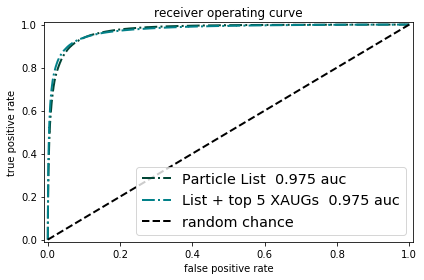

In [10]:
ROCfiles = ['RNNmsdROC.npz', 'RNN_XAUGmsdROC.npz']
labels = ['Particle List', 'List + top 5 XAUGs']


for i in range(len(ROCfiles)):
    roc = np.load(ROCfiles[i])
    x = roc['false_pos_rate']
    y = roc['true_pos_rate']
    auc = roc['auc']
    l = '{0}  {1:0.3f} auc'.format(labels[i], auc)
    plt.plot(x, y, lw=2, linestyle=ls_roc[1], color=cmap_roc(1-color_roc[i]), label=l)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right", fontsize='x-large')

plt.tight_layout()
plt.savefig('ROC_comparison_test.png')